### 사진 불러오기

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(1280, 721, 3)


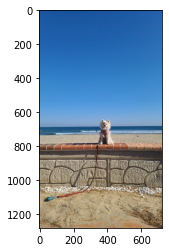

In [2]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image8.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(1280, 721, 3)


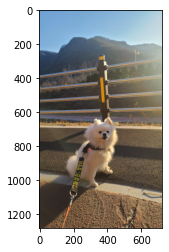

In [3]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/image7.jpg'  
img_orig2 = cv2.imread(img_path2) 

print(img_orig2.shape)
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()

(1280, 563, 3)


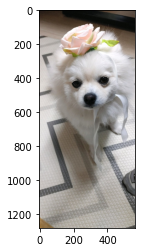

In [48]:
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_dog.jpg'  
img_orig3 = cv2.imread(img_path3) 
print(img_orig3.shape)
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.show()

(1280, 721, 3)


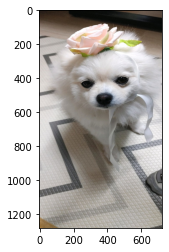

In [50]:
#image resize 적용 후 저장
img_orig3 = cv2.resize(img_orig3, dsize=(721, 1280), interpolation=cv2.INTER_CUBIC)
cv2.imwrite(os.getenv('HOME')+'/aiffel/human_segmentation/images/resize.jpg',img_orig3)
print(img_orig3.shape)
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.show()

### resize를 적용하는 이유 설명

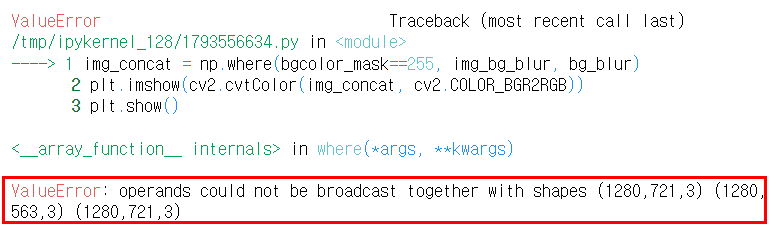

In [53]:
from IPython.display import Image 
path = os.getenv('HOME')+'/aiffel/human_segmentation/images/error.png' 
Image(path)

크로마키용 배경 이미지와 적용할 이미지가 서로 다르게 되면 이미지 사이즈 다름에 따른 오류 발생으로 이미지 사이즈 조정 필요

(1280, 721, 3)


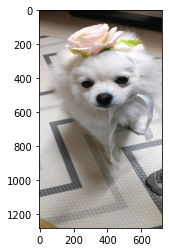

In [51]:
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/resize.jpg'  
img_orig3 = cv2.imread(img_path3) 
print(img_orig3.shape)
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.show()

### semantic_segmentation model 사용

In [6]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [7]:

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES) # 21

21

In [8]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

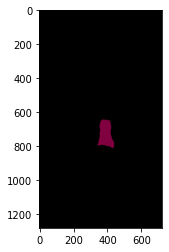

In [9]:
plt.imshow(output)
plt.show()

In [10]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


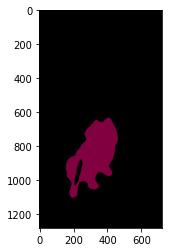

In [11]:
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
plt.imshow(output2)
plt.show()

In [12]:
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


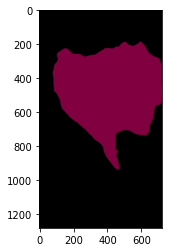

In [13]:
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)
plt.imshow(output3)
plt.show()

In [14]:
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


segvalues에는 class_ids와 mask가 있어 class_ids를 통해 어떤 물체가 담겨 있는지 확인 할 수 있다

In [15]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [16]:
colormap[12]

array([ 64,   0, 128])

In [17]:
colormap[0] # background 확인

array([0, 0, 0])

output 이미지가 BGR 순서로 배치되어 있기 때문에 RGB로 변경해줘야함

In [18]:
seg_color = (128,0,64)

(1280, 721)


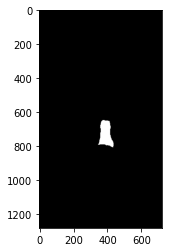

In [19]:
# seg_color로만 이루어진 mask 확인
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

(1280, 721)


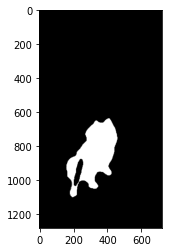

In [20]:
# seg_color로만 이루어진 mask 확인
seg_map2 = np.all(output2==seg_color, axis=-1)
print(seg_map2.shape)
plt.imshow(seg_map2, cmap='gray')
plt.show()

(1280, 721)


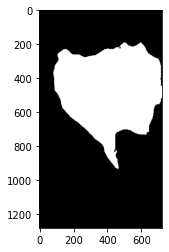

In [21]:
# seg_color로만 이루어진 mask 확인
seg_map3 = np.all(output3==seg_color, axis=-1)
print(seg_map3.shape)
plt.imshow(seg_map3, cmap='gray')
plt.show()

이미지에서 강아지는 흰색으로 나머지는 검은색으로 표시된 것을 볼 수 있다.

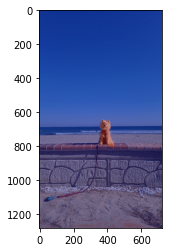

In [22]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

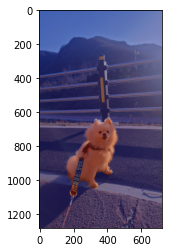

In [23]:
img_show2 = img_orig2.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask2 = seg_map2.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

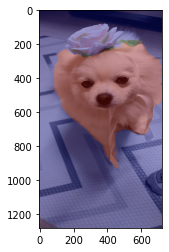

In [24]:
img_show3 = img_orig3.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask3 = seg_map3.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask3 = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show3 = cv2.addWeighted(img_show3, 0.6, color_mask3, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))
plt.show()

배경을 나타내는 부분은 파란빛으로 강아지를 나타내는 부분은 붉은빛으로 표시된 것을 볼 수 있다.

### 배경 흐리게 하기

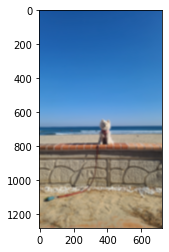

In [25]:
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

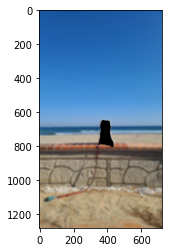

In [26]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

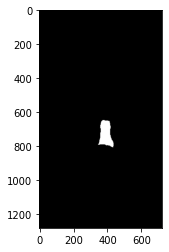

In [27]:
plt.imshow(cv2.cvtColor(img_mask_color, cv2.COLOR_BGR2RGB))
plt.show()

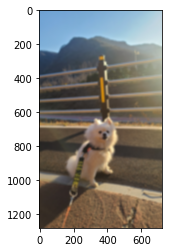

In [28]:
img_orig_blur2 = cv2.blur(img_orig2, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()

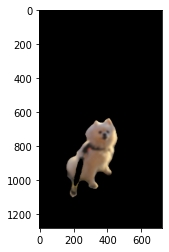

In [29]:
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_mask_color2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

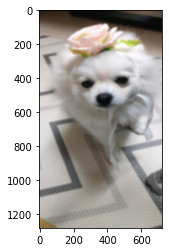

In [30]:
img_orig_blur3 = cv2.blur(img_orig3, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur3, cv2.COLOR_BGR2RGB))
plt.show()

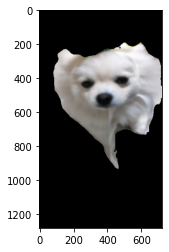

In [31]:
img_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_mask_color3)
plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
img_mask_color3

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [33]:
img_mask_color

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

### 흐린 배경과 원본 영상 합성

### 크로마키 적용 이미지 확인하기

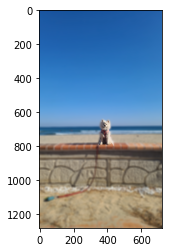

In [34]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

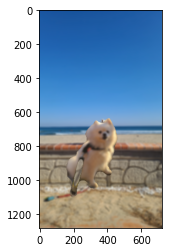

In [35]:
img_concat2 = np.where(img_mask_color2==255, img_bg_blur2, img_concat)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

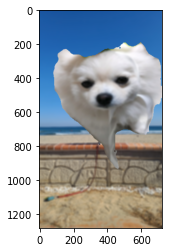

In [36]:
img_concat3 = np.where(img_mask_color3==255, img_bg_blur3, img_concat)
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.show()

### 사진 문제점 찾아 표시하기

#### 1. 사진과 다른 종류로 나올 경우 세그먼테이션 문제점 발생

(4000, 2252, 3)


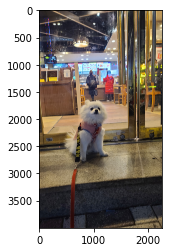

In [37]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image5.jpg'  
img = cv2.imread(path) 

print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(path)

In [39]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bird


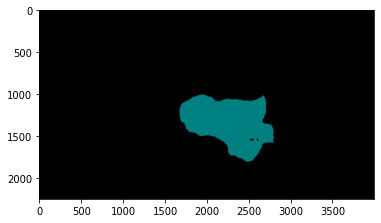

In [40]:
plt.imshow(output)
plt.show()

image5에 나타난 강아지 사진으로 세그먼테이션을 적용하여 사진을 분류한 결과로 bird로 다른 결과가 나타난 것을 볼 수 있다.
<br/>
bird로 나타난 후 output을 출력하면 기존의 이미지에서 -90도로 돌아간 방향의 결과가 나타났다.

#### 2. 크로마키 적용 문제점

a. 위치 조정 문제

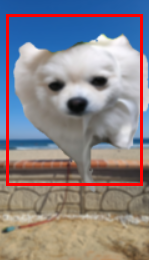

In [47]:
from IPython.display import Image 
path = os.getenv('HOME')+'/aiffel/human_segmentation/images/se2.png' 
Image(path)

b. 필요한 부분까지 제거

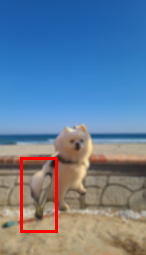

In [52]:
from IPython.display import Image 
path = os.getenv('HOME')+'/aiffel/human_segmentation/images/se3.png' 
Image(path)

### 해결방안 제시하기

Semantic Segmentation의 주요 목적은 해당 이미지가 어떤 class에 속하는지 판단하는 것이다. 위의 이미지와 같이 강아지와 다른 물체가 같이 찍혀있는 경우 과도하게 class에 속하는 부분만 추출하는 결과로 인해 강아지의 특정 부분이 제거된 이미지가 나오는 현상이 나타난다.
<br/>
이렇듯 특정 class에 속하는 mask만 가지고 적용하게 되면 내가 원하는 부분은 제외되고 적용되는 문제가 발생하기 때문에 특정 class로 구분하지 말고 깊이 정보를 가져올 수 있는 센서를 활용할 수 있는 uDepth 기술을 활용하여 segmentation기법을 적용하여 이전의 문제점을 개선시킬 수 있다.

전반적인 흐름도

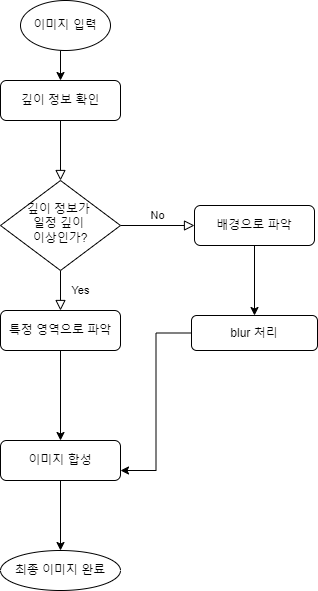

In [54]:
path = os.getenv('HOME')+'/aiffel/human_segmentation/images/flowchat.png' 
Image(path)

깊이 정보 파악에 대한 예시 흐름도

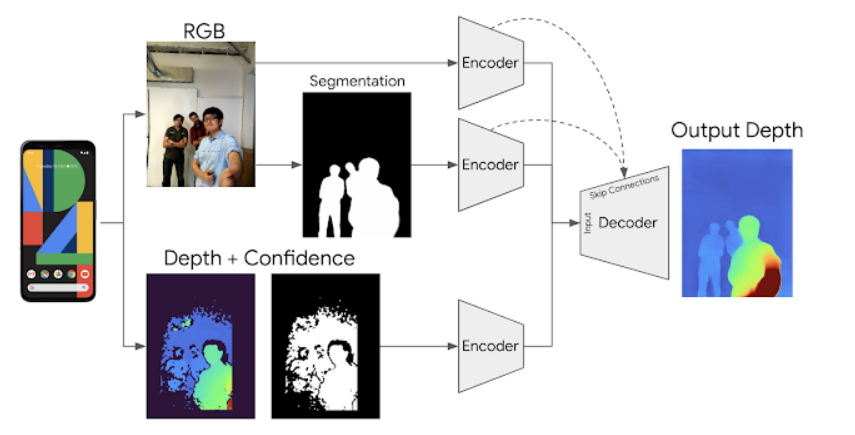

In [55]:
path = os.getenv('HOME')+'/aiffel/human_segmentation/images/depth활용.png' 
Image(path)

깊이 정보를 받을 수 있는 카메라를 활용하여 해당 깊이 정보를 파악하여 특정 영역(class)로 처리하여 segmentation을 적용하면 원하는 영역만 포커스로 맞출 수 있을 것이다.